# GitHub Repository Scraper and Text Analysis

## Introduction

This project demonstrates web scraping using the GitHub API to extract repository metadata based on a keyword search. The goal is to collect repository information such as name, URL, description, and programming language, and perform a basic text analysis on the descriptions to identify common terms and trends.

Libraries used: `requests`, `pandas`, `re`, `nltk`


In [1]:
import requests 
import pandas as pd
import matplotlib.pyplot as plt
import re
!pip install nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\h\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Data Collection

Using GitHub's API to search for repositories related to "data analysis" and retrieve key metadata.


In [3]:
url = "https://api.github.com/search/repositories"

params={"q":"data-analysis","sort":"stars","order":"desc","per_page":100}

response = requests.get(url,params)

if response.status_code == 200 :
    data = response.json()
    items = data["items"]
    print(f'there are {len(items)} repositories')

repo_data =[]
for repo in items:
    repo_info = {'Name':repo['name'],
                 'Owners':repo['owner'],
                 'Stars':repo['stargazers_count'],
                 'Forks':repo['forks_count'],
                 'Language':repo['language'],
                 'Description':repo['description'],
                 'Last Updated':repo['updated_at'],
                 'Repo Url':repo['html_url']}
    repo_data.append(repo_info)

df = pd.DataFrame(repo_data)

there are 100 repositories


## Data Cleaning

dropping duplicates and missing values.


In [5]:
df.drop_duplicates(subset=['Name','Repo Url'],inplace=True)
df.dropna(inplace=True)
df.to_csv('cleaned_repo_data.csv',index=False)

 ## Most Used Languages Analysis

To uncover trends in project development, we analyzed the most commonly used programming languages across GitHub repositories. This helps identify the technologies currently in demand.


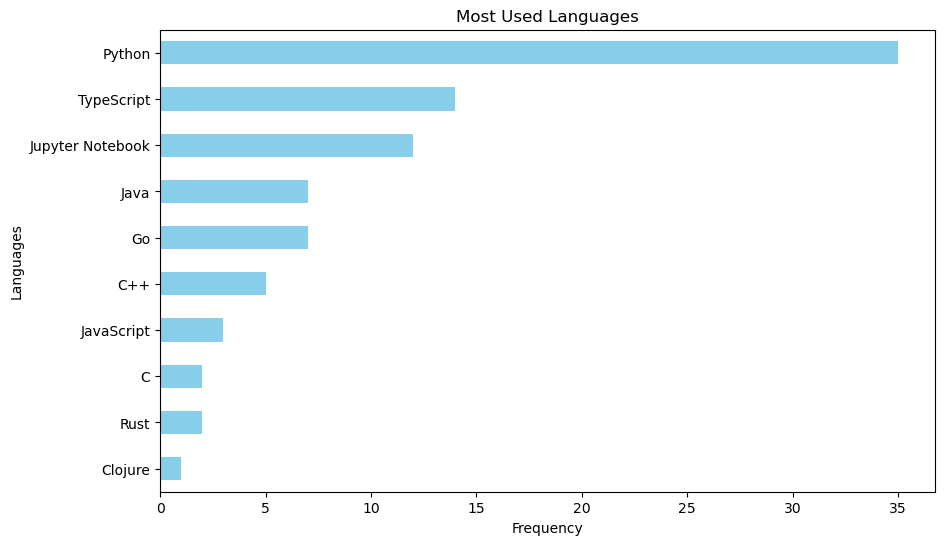

In [7]:
language_count = df['Language'].value_counts()
language_count.head(10).plot(kind='barh',figsize=(10,6),color='skyblue').plot(kind='barh',figsize=(10,6),color='skyblue')
plt.title('Most Used Languages')
plt.xlabel('Frequency')
plt.ylabel('Languages')
plt.gca().invert_yaxis()
plt.show()

## Text Preprocessing and Tokenization

To analyze repository descriptions effectively, we clean and tokenize the text. Some multi-word phrases are preserved by replacing spaces with underscores before tokenization.


In [9]:
phrases = ['data analysis' , 'data analytics', 'data visualization', 'web scraping', 'jupyter notebook', 'machine learning']
def preserved_phrases(text):
    for phrase in phrases:
        text = text.replace(phrase,phrase.replace(' ','_'))
        return text
        
df['cleaned_Description'] = df['Description'].fillna('').apply(lambda x:re.sub(r'[^\w\s]',' ',preserved_phrases(x.lower())))
tokenized_text = df['cleaned_Description'].str.split().explode().str.strip()
all_words = list(tokenized_text)

stop_words = set(stopwords.words('english')+stopwords.words('chinese'))
filtered_words = [word for word in all_words if word not in stop_words]

## Keyword Frequency Analysis

Finding the most common words across the cleaned repository descriptions.


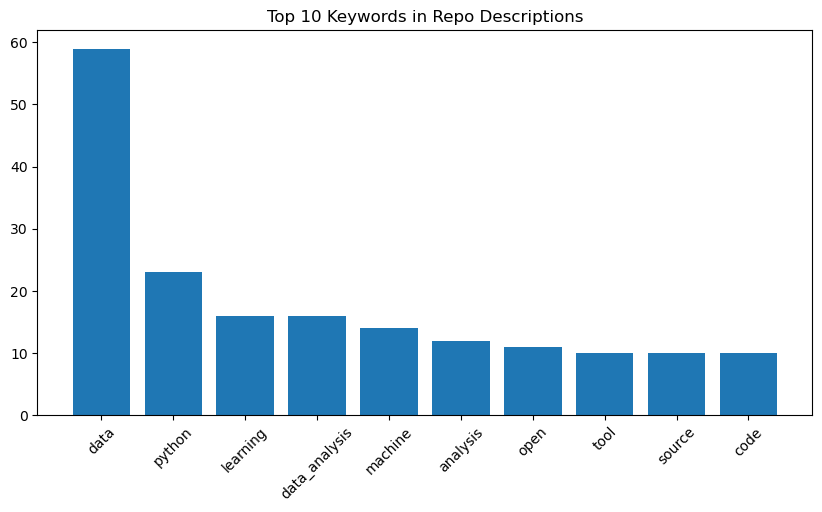

In [11]:
from collections import Counter
words_freq = Counter(filtered_words)
top_words = words_freq.most_common(10)
words, counts = zip(*top_words)
plt.figure(figsize=(10,5))
plt.bar(words, counts)
plt.title("Top 10 Keywords in Repo Descriptions")
plt.xticks(rotation=45)
plt.show()

## Conclusion

This project highlights practical web scraping and data processing skills using Python and GitHub’s API. By collecting and analyzing repository descriptions, we gain a quick view of trending concepts like "machine learning", "visualization", and "automation" in data analysis repositories.

Future improvements could include scraping multiple pages using pagination, or analyzing stars/forks.
